In [58]:
import tensorflow as tf
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [59]:
tf.keras.preprocessing.image_dataset_from_directory

<function keras.utils.image_dataset.image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, **kwargs)>

(2048, 2048)
(34, 34)


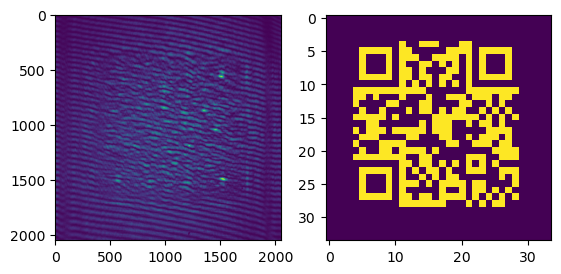

In [27]:
holo_path = '/home/drozdovmk/holo_data/25_inline/HOLO_25_inline/'
qr_path = '/home/drozdovmk/holo_data/25_inline/QR_25_inline/'

files = os.listdir(qr_path)
files
image = cv2.imread(qr_path + '0.png', cv2.IMREAD_GRAYSCALE)
holo = cv2.imread(holo_path + '000000.tif',cv2.IMREAD_GRAYSCALE )
# Display the image
fig,ax = plt.subplots(1,2)
print(holo.shape)
print(image.shape)
ax[0].imshow(holo)
ax[1].imshow(image)

In [79]:
random_seed = 45
qr_train, qr_val = tf.keras.preprocessing.image_dataset_from_directory(qr_path, labels = None,
                                                    color_mode = 'grayscale', batch_size = 32, image_size = (34, 34),
                                                    subset = 'both', validation_split=0.15, seed = random_seed)
holo_train, holo_val = tf.keras.preprocessing.image_dataset_from_directory(holo_path, labels = None,
                                                    color_mode = 'grayscale', batch_size = 32, image_size = (2048, 2048),
                                                    subset = 'both', validation_split=0.15, seed = random_seed)


Found 9994 files belonging to 1 classes.
Using 8495 files for training.
Using 1499 files for validation.
Found 0 files belonging to 1 classes.
Using 0 files for training.
Using 0 files for validation.


ValueError: No training images found in directory /home/drozdovmk/holo_data/25_inline/HOLO_25_inline/. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

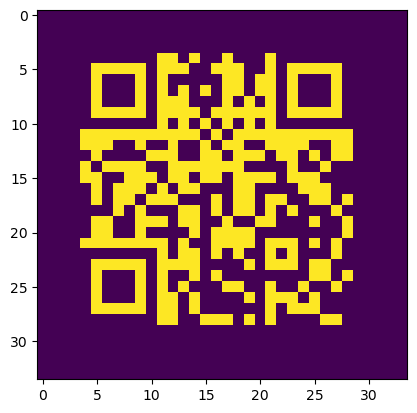

In [77]:
for x in qr_train:
    plt.imshow(x[0,:,:,])
    break

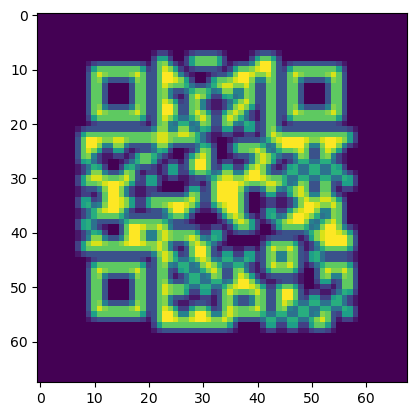

In [48]:
new_image = cv2.resize(image, (68,68))
plt.imshow(new_image);
# plt.hist(new_image.flatten())

In [20]:
class DataGenerator(Sequence):
    def __init__(self, hologram_dir, qr_dir, batch_size=32, shuffle=True):
        self.hologram_dir = hologram_dir
        self.qr_dir = qr_dir
        self.hologram_filenames = os.listdir(hologram_dir)
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.hologram_filenames))
        if shuffle:
            np.random.shuffle(self.indexes)

    def __len__(self):
        return int(np.floor(len(self.hologram_filenames) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_holograms = [cv2.imread(os.path.join(self.hologram_dir, self.hologram_filenames[k])) for k in indexes]
        batch_qrs = [cv2.imread(os.path.join(self.qr_dir, self.hologram_filenames[k])) for k in indexes]
        return np.array(batch_holograms), np.array(batch_qrs)

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

In [24]:
dg = DataGenerator(holo_path, qr_path)
dg[0][0]

[ WARN:0@1284.122] global loadsave.cpp:244 findDecoder imread_('/home/drozdovmk/holo_data/25_inline/QR_25_inline/004699.tif'): can't open/read file: check file path/integrity
[ WARN:0@1284.122] global loadsave.cpp:244 findDecoder imread_('/home/drozdovmk/holo_data/25_inline/QR_25_inline/005678.tif'): can't open/read file: check file path/integrity
[ WARN:0@1284.122] global loadsave.cpp:244 findDecoder imread_('/home/drozdovmk/holo_data/25_inline/QR_25_inline/005617.tif'): can't open/read file: check file path/integrity
[ WARN:0@1284.122] global loadsave.cpp:244 findDecoder imread_('/home/drozdovmk/holo_data/25_inline/QR_25_inline/003179.tif'): can't open/read file: check file path/integrity
[ WARN:0@1284.122] global loadsave.cpp:244 findDecoder imread_('/home/drozdovmk/holo_data/25_inline/QR_25_inline/001252.tif'): can't open/read file: check file path/integrity
[ WARN:0@1284.122] global loadsave.cpp:244 findDecoder imread_('/home/drozdovmk/holo_data/25_inline/QR_25_inline/005672.tif')

array([[[[25, 25, 25],
         [26, 26, 26],
         [26, 26, 26],
         ...,
         [12, 12, 12],
         [11, 11, 11],
         [10, 10, 10]],

        [[24, 24, 24],
         [26, 26, 26],
         [25, 25, 25],
         ...,
         [11, 11, 11],
         [10, 10, 10],
         [11, 11, 11]],

        [[24, 24, 24],
         [24, 24, 24],
         [24, 24, 24],
         ...,
         [11, 11, 11],
         [11, 11, 11],
         [11, 11, 11]],

        ...,

        [[19, 19, 19],
         [18, 18, 18],
         [17, 17, 17],
         ...,
         [17, 17, 17],
         [18, 18, 18],
         [17, 17, 17]],

        [[20, 20, 20],
         [20, 20, 20],
         [18, 18, 18],
         ...,
         [14, 14, 14],
         [15, 15, 15],
         [16, 16, 16]],

        [[19, 19, 19],
         [19, 19, 19],
         [21, 21, 21],
         ...,
         [14, 14, 14],
         [15, 15, 15],
         [15, 15, 15]]],


       [[[21, 21, 21],
         [22, 22, 22],
         [22, 